General observations

1. According to the boxplot of the final tumor volume for each mouse across the 4 most effective regimens, the one that has the best response is Ramicane. That regimen achieved a maximum tumor value between 22 mm3 and 45 mm3. The second best regimen is Capomulin which achieved a maximun tumor volume between 25 mm3 and 58 mm3

2. From the line plot of timepoint versus volume of mouse "b128" I observed that Capomulin had a really nice reactin. The tumour volume decreased 6 mm3 between the start and the end of the treatment. The Capomulin treatment had a better result decreasing the volume of the tumor between the 25-35 timepoints; the tumor decreased 5 mm3.

3. From the scatter plot it can be inferred that there's a strong corrlation between the tumor volume and the mouse wight for tne mouse under the Capomulin regimen. It means that the more the weight of a mouse is, bigger the tumor will be. 

# Matplotlib Homework - The Power of Plots 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

## Get data 

In [2]:
# Get data from CSV files.
mouse_df = pd.read_csv("Mouse_metadata.csv")
study_df = pd.read_csv("Study_results.csv")

# Combine data into a single df.
df = pd.merge(study_df, mouse_df, how='inner', on ="Mouse ID")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Mean 
mean_df = df.groupby(df["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
# Median 
median_df = df.groupby(df["Drug Regimen"]).median()["Tumor Volume (mm3)"]
# Variance
var_df = df.groupby(df["Drug Regimen"]).var()["Tumor Volume (mm3)"]
# Standard deviation
stdev_df = df.groupby(df["Drug Regimen"]).std()["Tumor Volume (mm3)"]
# SEM
sem_df = df.groupby(df["Drug Regimen"]).sem()["Tumor Volume (mm3)"] 

# Create df from the df above.
summary_df = pd.DataFrame({"Mean":mean_df, "Median":median_df, "Variance":var_df,
                          "Standard Deviation":stdev_df, "SEM":sem_df})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

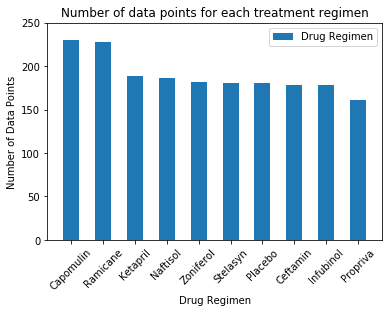

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_points = df["Drug Regimen"].value_counts()
regimen_points.plot(kind="bar", rot = 45, title = "Number of data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.legend(loc = 'best')
plt.xlim(-0.75, len(regimen_points)-0.25)
plt.ylim(0, max(regimen_points)+20)
plt.show()

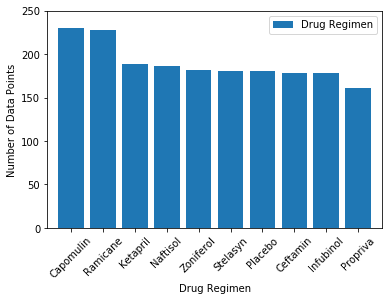

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_points = df["Drug Regimen"].value_counts()
x = regimen_points.index
height = regimen_points
plt.bar(x, height)
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlim(-0.75, len(regimen_points)-0.25)
plt.ylim(0, max(regimen_points)+20)
plt.legend(["Drug Regimen"])
plt.show()

## Pie plots

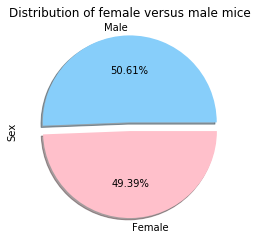

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dist_sex = df["Sex"].value_counts()
colors = ["lightskyblue", "pink"]
explode = [0.1, 0]
dist_sex.plot(kind = "pie", autopct = "%1.2f%%", title = "Distribution of female versus male mice", 
              colors = colors, explode = explode, shadow = True)
plt.show()

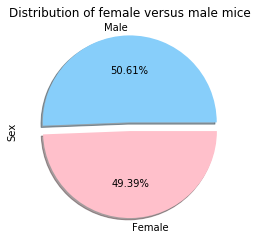

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dist_sex = df["Sex"].value_counts()
colors = ["lightskyblue", "pink"]
explode = [0.1, 0]
plt.pie(x = dist_sex, labels = dist_sex.index, autopct = "%1.2f%%", colors = colors,
        explode = explode, shadow = True)
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots 

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [28]:
# Get the max tumor volume for each mouse, by using a groupby function.
tumor_max_df = df.groupby("Mouse ID", as_index = False).max()
tumor_max_df = tumor_max_df[["Mouse ID", "Timepoint"]].merge(df, 
                                                             on = ["Mouse ID", "Timepoint"],
                                                             how = "left")

In [29]:
# Capomulin df
capomulin_df = tumor_max_df.loc[tumor_max_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
# Quartiles
capomulin_quartiles = capomulin_df.quantile([0.25, 0.5, 0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
# Lower and Upper bound
capomulin_lower_bound = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5 * capomulin_iqr)
print("Campomulin DF potential outliers: " + str(capomulin_df.loc[(capomulin_df < capomulin_lower_bound) 
                                                              | (capomulin_df > capomulin_upper_bound)]))

# Ramicane df
ramicane_df = tumor_max_df.loc[tumor_max_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
# Quartiles
ramicane_quartiles = ramicane_df.quantile([0.25, 0.5, 0.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
# Lower and Upper bound
ramicane_lower_bound = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5 * ramicane_iqr)
print("Ramicane DF potential outliers: " + str(ramicane_df.loc[(ramicane_df < ramicane_lower_bound) | (ramicane_df > ramicane_upper_bound)]))

# Infubinol df
infubinol_df = tumor_max_df.loc[tumor_max_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
# Quartiles
infubinol_quartiles = infubinol_df.quantile([0.25, 0.5, 0.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
# Lower and Upper bound
infubinol_lower_bound = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5 * infubinol_iqr)
print("Infubinol DF potential outliers: " + str(infubinol_df.loc[(infubinol_df < infubinol_lower_bound) | (infubinol_df > infubinol_upper_bound)]))

# Ceftamin df
ceftamin_df = tumor_max_df.loc[tumor_max_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
# Quartiles
ceftamin_quartiles = ceftamin_df.quantile([0.25, 0.5, 0.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
# Lower and Upper bound
ceftamin_lower_bound = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5 * ceftamin_iqr)
print("Ceftamin DF potential outliers: " + str(ceftamin_df.loc[(ceftamin_df < ceftamin_lower_bound) | (ceftamin_df > ceftamin_upper_bound)]))

Campomulin DF potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane DF potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol DF potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin DF potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


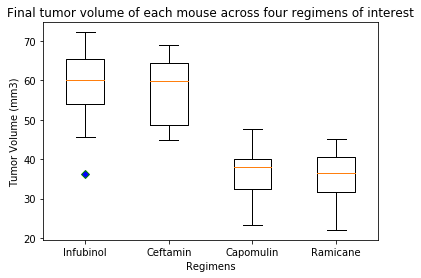

In [37]:
# Generate a box plot of the final tumor volume of 
# each mouse across four regimens of interest
plt.boxplot([infubinol_df, ceftamin_df, capomulin_df, ramicane_df],
           labels = ["Infubinol", "Ceftamin", "Capomulin", "Ramicane"],
           flierprops={'marker': 'D', 'markerfacecolor':'blue',
                       'markersize':5, 'markeredgecolor':'g'})
plt.title("Final tumor volume of each mouse across four regimens of interest")
plt.xlabel("Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and scatter plots 

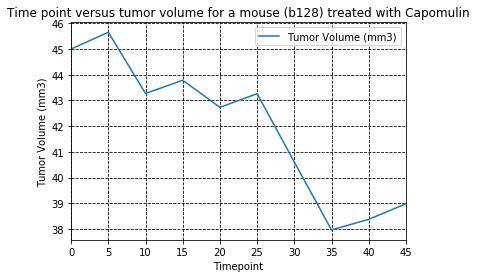

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter data by "Drug Regimen" column, equal to "Capomulin"
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
# Choose a mouse and extract the data from it
mouse_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
mouse_capomulin.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", 
                     title = "Time point versus tumor volume for a mouse (b128) treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(color = 'k', ls = '--')
plt.show()

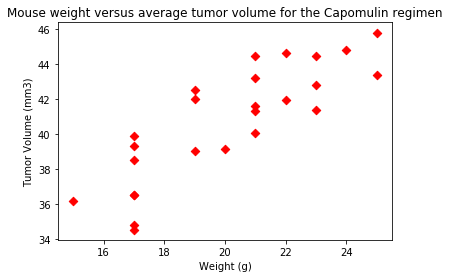

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Filter data by "Drug Regimen" column, equal to "Capomulin"
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
# Get average tumor volume
average_df = capomulin_df.groupby("Mouse ID").mean()
plt.scatter(x = average_df["Weight (g)"], y = average_df["Tumor Volume (mm3)"],
           color = 'r', marker = 'D')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.show()

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.842

Linear Equation: y = 0.95x + 21.55



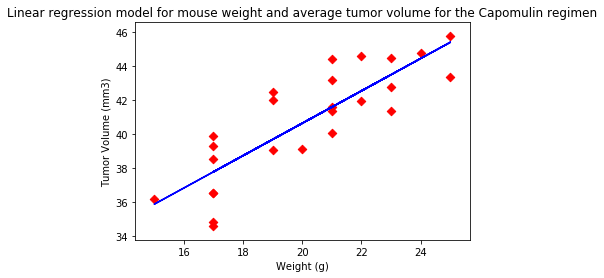

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average 
#tumor volume for the Capomulin regimen

# Use Perason fucntion to get correlation between the two variables
correlation_coeff = st.pearsonr(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])
print("The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is "+
      str(round(correlation_coeff[0],3)) + "\n")

# Get linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(average_df["Weight (g)"], 
                                                            average_df["Tumor Volume (mm3)"])
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print( "Linear Equation: "+ linear_equation + "\n")

# Get X and Y from the equation
x = average_df["Weight (g)"]
average_df["Tumor Volume (mm3) Prediction"] = slope * x + intercept

# Plot actual and predicted data
plt.plot(x,average_df["Tumor Volume (mm3) Prediction"], color = "b")
plt.scatter(x = average_df["Weight (g)"], y = average_df["Tumor Volume (mm3)"],
           color = 'r', marker = 'D')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear regression model for mouse weight and average tumor volume for the Capomulin regimen")
plt.show()